rough mayorga

In [12]:
import math
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE

In [2]:
## Trusty Modules

from Acquire import get_texas_data
from Prepare import prepare_tex

# Acquire

In [3]:
df = get_texas_data()

In [ ]:
df.info()

# Prepare

In [4]:
df = prepare_tex(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144733 entries, 0 to 144737
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   agency_id       144733 non-null  int64         
 1   agency          144733 non-null  object        
 2   lastname        144733 non-null  object        
 3   firstname       144733 non-null  object        
 4   title           144733 non-null  object        
 5   race            144733 non-null  object        
 6   sex             144733 non-null  object        
 7   emptype         144733 non-null  object        
 8   hire_date       144733 non-null  datetime64[ns]
 9   hours_worked    144733 non-null  float64       
 10  monthly_salary  144733 non-null  float64       
 11  annual_salary   144733 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 14.4+ MB


In [6]:
df.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,monthly_salary,annual_salary
0,101,SENATE ...,GILLIAM,STACEY,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2013-07-01,20.0,8100.0,97200.0
1,104,LEGISLATIVE BUDGET BOARD ...,GILLIAM,STACEY,COMMITTEE DIRECTOR ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,7000.0,84000.0
2,101,SENATE ...,NELSON,DAVID,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1998-12-01,20.0,9500.0,114000.0
3,104,LEGISLATIVE BUDGET BOARD ...,NELSON,DAVID,SENIOR BUDGET ADVISOR ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,8000.0,96000.0
4,101,SENATE ...,ROCHA,MARIE,LEG. SERVICE/MAINTENANCE ...,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2003-05-01,41.0,3365.4,40384.8


# Explore

In [7]:
df.columns

Index(['agency_id', 'agency', 'lastname', 'firstname', 'title', 'race', 'sex',
       'emptype', 'hire_date', 'hours_worked', 'monthly_salary',
       'annual_salary'],
      dtype='object')

In [10]:
df.race.value_counts()

WHITE              64650
HISPANIC           39554
BLACK              33963
ASIAN               4419
OTHER               1453
AM INDIAN            694
Name: race, dtype: int64

In [13]:
label_encoder = LabelEncoder() ## creating my label encoder

## creating a race column that is incoded for machine readable formate
df['race_encoded'] = label_encoder.fit_transform(df['race'])

<AxesSubplot:>

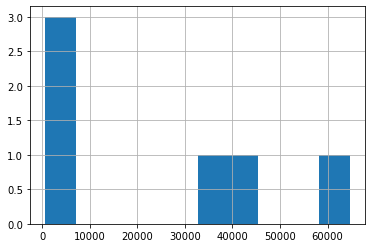

In [11]:
df.race.value_counts().hist()

In [14]:
df.race_encoded.value_counts()

5    64650
3    39554
2    33963
1     4419
4     1453
0      694
Name: race_encoded, dtype: int64

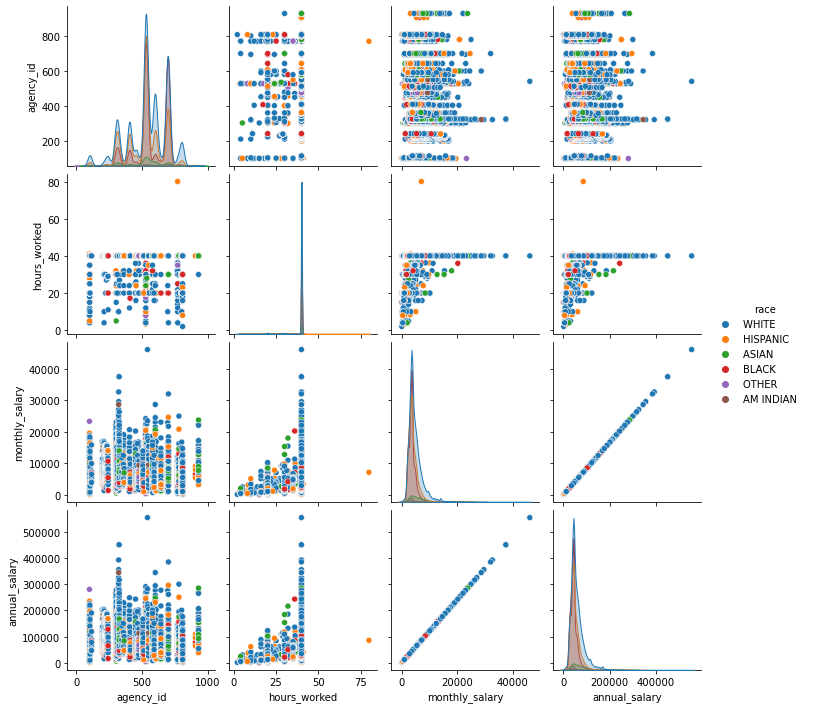

In [9]:
sns.pairplot(data=df, hue='race')

In [18]:
df.columns

Index(['agency_id', 'agency', 'lastname', 'firstname', 'title', 'race', 'sex',
       'emptype', 'hire_date', 'hours_worked', 'monthly_salary',
       'annual_salary', 'race_encoded'],
      dtype='object')

In [19]:
df.hire_date

0        2013-07-01
1        2017-11-01
2        1998-12-01
3        2017-11-01
4        2003-05-01
            ...    
144733   2016-11-01
144734   2017-10-30
144735   2015-07-13
144736   2012-10-15
144737   2012-02-16
Name: hire_date, Length: 144733, dtype: datetime64[ns]